In [1]:
import warnings

import matplotlib_inline.backend_inline
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("png", dpi=200)
warnings.filterwarnings("ignore")  # Ignore warnings for the purpose of this tutorial

# Structure functions with 3D data
This example will walk you through the steps required to generate structure functions for a 3D velocity field. The example data was generated with [Oceananigans.jl](https://clima.github.io/OceananigansDocumentation/stable/).

**General procedure:**

1. Set up plot environment and load the dataset
2. Plot the velocity fields and spatial gradients
3. Calculate a variety of structure functions along different directions
4. Plot structure functions as a function of length scale

### Download sample dataset with Pooch
We will use [Pooch](https://github.com/fatiando/pooch) to download a sample dataset.

In [2]:
import pooch

file_path = pooch.retrieve(
    url="https://zenodo.org/records/15278227/files/langmuir_fields.nc",
    known_hash="d32f5f4c02791ddc584abecc572a5f06a948638ba4e45c4d6952a0723c3c1e40")

## Load the dataset
This is a numerical simulation of Langmuir turbulence, generated with [Oceananigans.jl](https://clima.github.io/OceananigansDocumentation/stable/). 

In [3]:
import xarray as xr

ds = xr.load_dataset(file_path)
ds = ds.isel(time=1)

## Calculate spatial gradients of the velocity fields

In [4]:
import numpy as np

dx = np.abs(ds.xC[0] - ds.xC[1])
dy = np.abs(ds.yC[0] - ds.yC[1])
dz = np.abs(ds.zC[0] - ds.zC[1])

dudz, dudy, dudx = np.gradient(ds.u, 1, 1, 1, axis=(0, 1, 2))
dvdz, dvdy, dvdx = np.gradient(ds.v, 1, 1, 1, axis=(0, 1, 2))
dwdz, dwdy, dwdx = np.gradient(ds.w, 1, 1, 1, axis=(0, 1, 2))

## Visualize the velocity fields and gradients

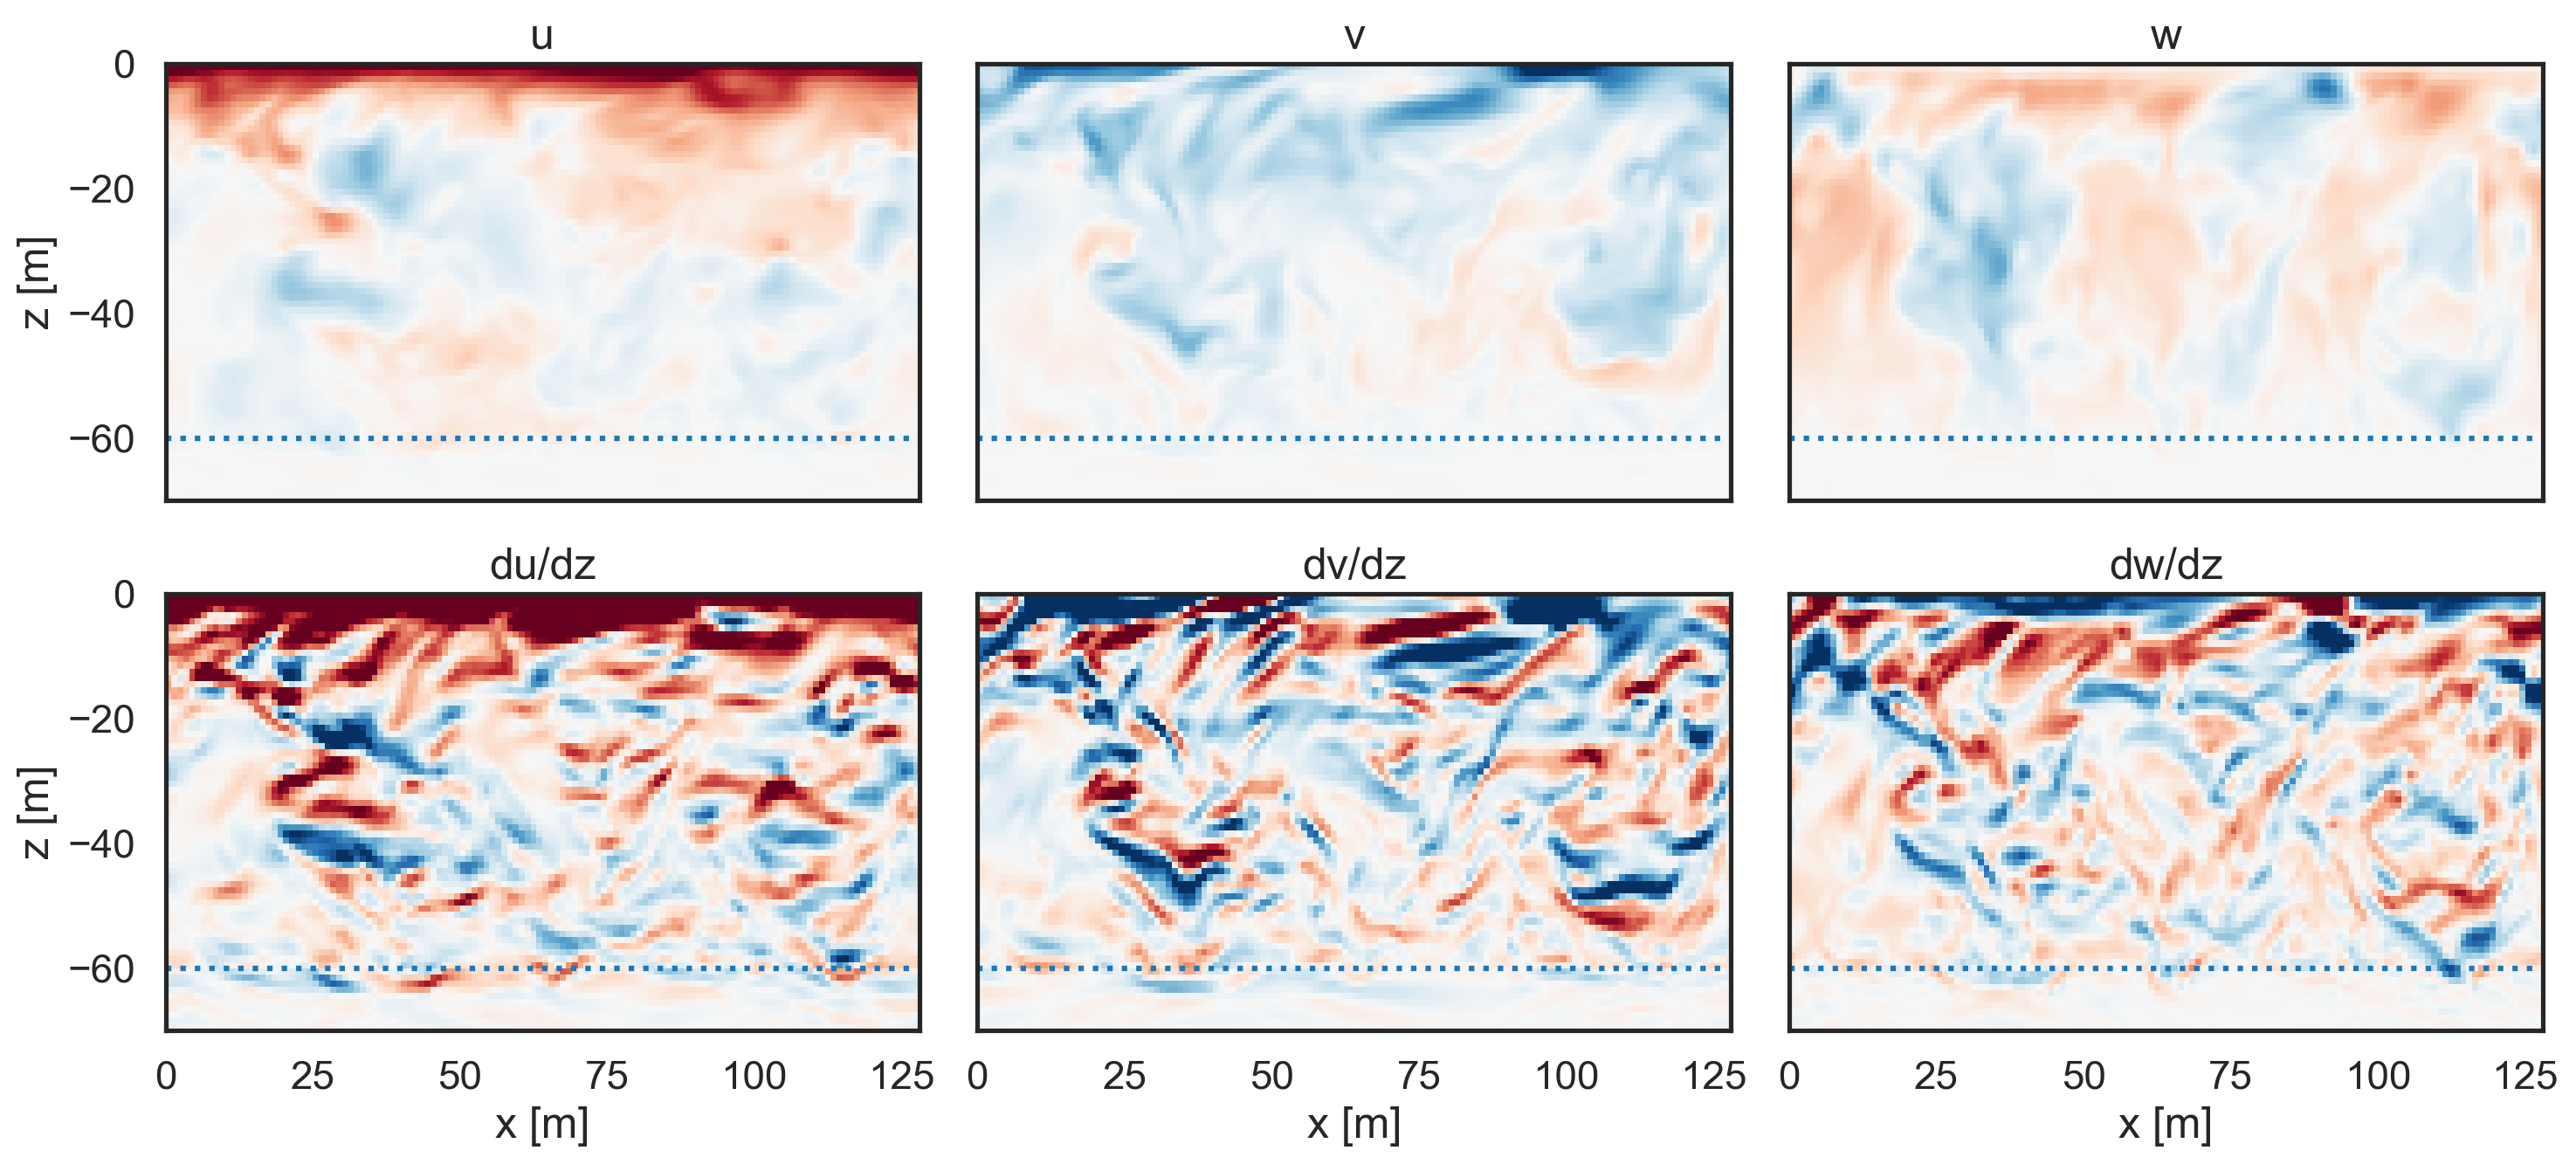

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(15, 7), sharey=True)

pc1 = ax[0, 0].pcolormesh(
    ds.xC, ds.zC, ds.u[:, 64, :], cmap="RdBu_r", vmin=-0.05, vmax=0.05
)
pc2 = ax[0, 1].pcolormesh(
    ds.xC, ds.zC, ds.v[:, 64, :], cmap="RdBu_r", vmin=-0.05, vmax=0.05
)
pc3 = ax[0, 2].pcolormesh(
    ds.xC, ds.zF, ds.w[:, 64, :], cmap="RdBu_r", vmin=-0.05, vmax=0.05
)
pc4 = ax[1, 0].pcolormesh(
    ds.xC, ds.zC, dudz[:, 64, :], cmap="RdBu_r", vmin=-0.005, vmax=0.005
)
pc5 = ax[1, 1].pcolormesh(
    ds.xC, ds.zC, dvdz[:, 64, :], cmap="RdBu_r", vmin=-0.005, vmax=0.005
)
pc6 = ax[1, 2].pcolormesh(
    ds.xC, ds.zF, dwdz[:, 64, :], cmap="RdBu_r", vmin=-0.005, vmax=0.005
)


ax[0, 0].plot([0, 128], [-60, -60], ":")
ax[0, 1].plot([0, 128], [-60, -60], ":")
ax[0, 2].plot([0, 128], [-60, -60], ":")
ax[1, 0].plot([0, 128], [-60, -60], ":")
ax[1, 1].plot([0, 128], [-60, -60], ":")
ax[1, 2].plot([0, 128], [-60, -60], ":")


ax[0, 0].set_ylabel("z [m]")
ax[1, 0].set_ylabel("z [m]")
ax[1, 0].set_xlabel("x [m]")
ax[1, 1].set_xlabel("x [m]")
ax[1, 2].set_xlabel("x [m]")

ax[0, 0].set_title("u")
ax[0, 1].set_title("v")
ax[0, 2].set_title("w")
ax[1, 0].set_title("du/dz")
ax[1, 1].set_title("dv/dz")
ax[1, 2].set_title("dw/dz")

ax[0, 0].set_xticks([]), ax[0, 1].set_xticks([]), ax[0, 2].set_xticks([])
ax[0, 0].set_ylim([-70, 0])

plt.tight_layout();

# cbar = fig.colorbar(pc1, ax=ax, orientation="vertical",label='[m/s]')

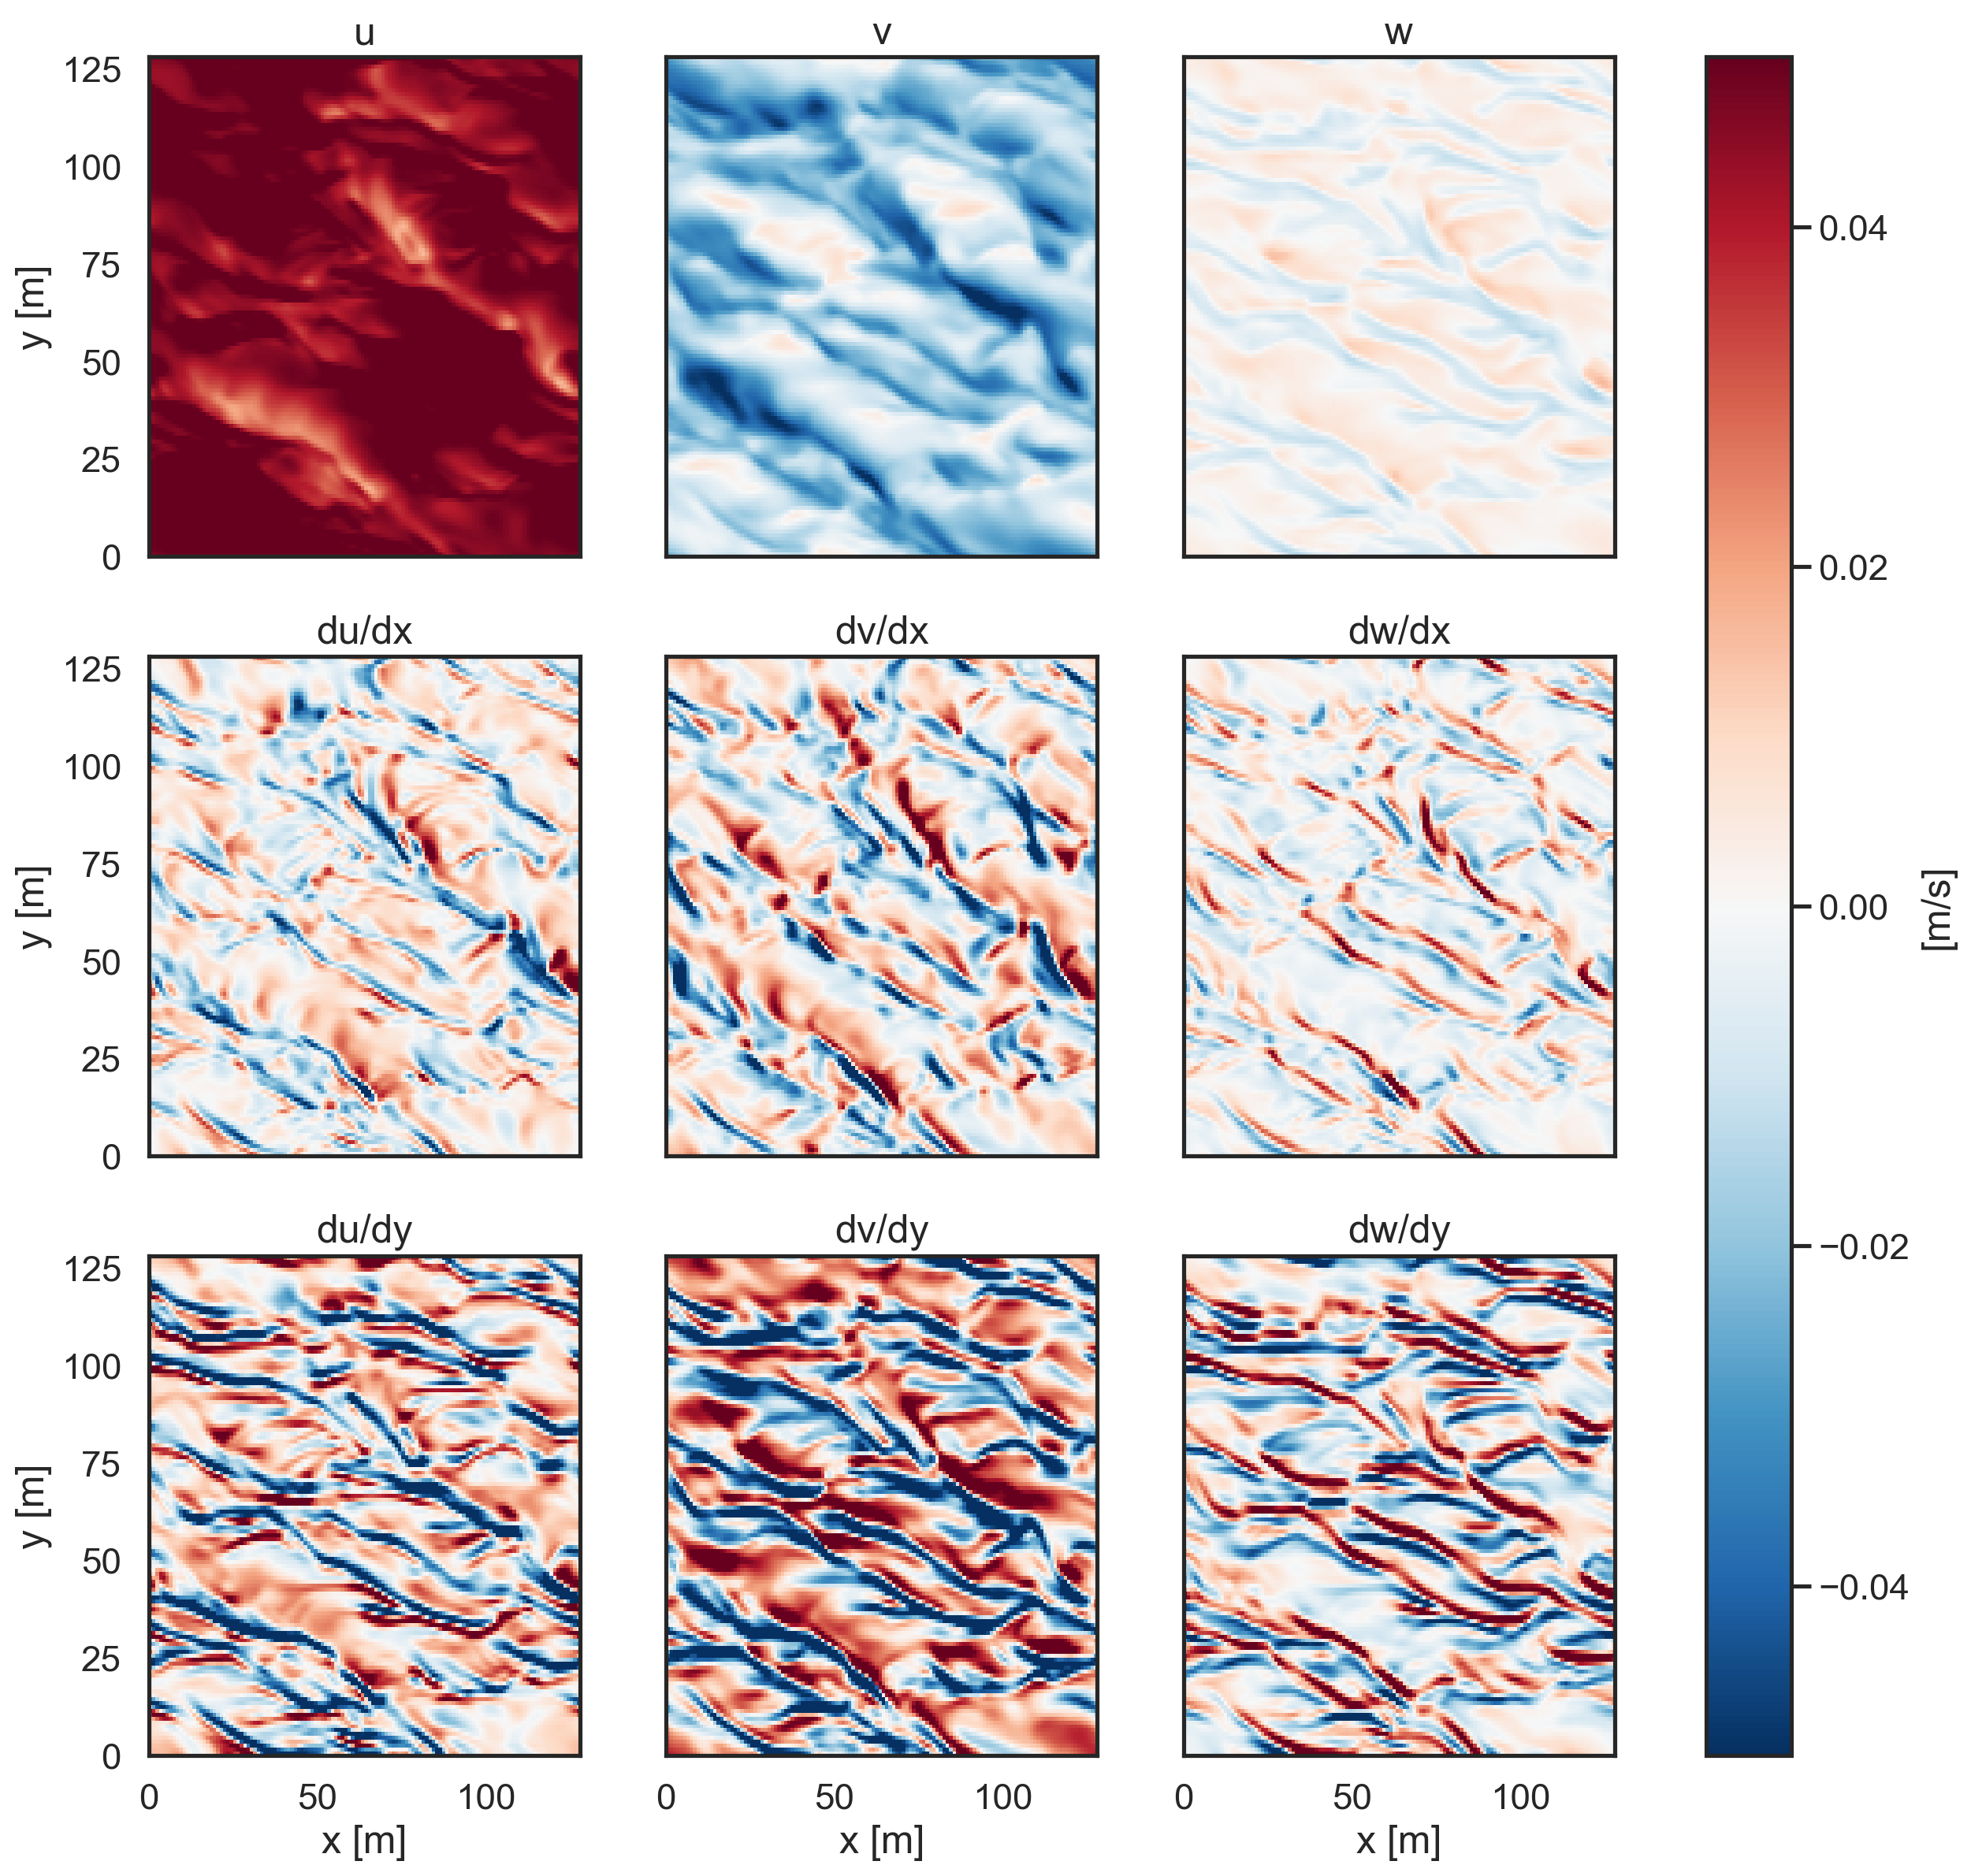

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(15, 14), sharey=True)

pc1 = ax[0, 0].pcolormesh(
    ds.xC, ds.yC, ds.u[-2, :, :], cmap="RdBu_r", vmin=-0.05, vmax=0.05
)
pc2 = ax[0, 1].pcolormesh(
    ds.xC, ds.yC, ds.v[-2, :, :], cmap="RdBu_r", vmin=-0.05, vmax=0.05
)
pc3 = ax[0, 2].pcolormesh(
    ds.xC, ds.yC, ds.w[-2, :, :], cmap="RdBu_r", vmin=-0.05, vmax=0.05
)
pc4 = ax[1, 0].pcolormesh(
    ds.xC, ds.yC, dudx[-2, :, :], cmap="RdBu_r", vmin=-0.005, vmax=0.005
)
pc5 = ax[1, 1].pcolormesh(
    ds.xC, ds.yC, dvdx[-2, :, :], cmap="RdBu_r", vmin=-0.005, vmax=0.005
)
pc6 = ax[1, 2].pcolormesh(
    ds.xC, ds.yC, dwdx[-2, :, :], cmap="RdBu_r", vmin=-0.005, vmax=0.005
)
pc7 = ax[2, 0].pcolormesh(
    ds.xC, ds.yC, dudy[-2, :, :], cmap="RdBu_r", vmin=-0.005, vmax=0.005
)
pc8 = ax[2, 1].pcolormesh(
    ds.xC, ds.yC, dvdy[-2, :, :], cmap="RdBu_r", vmin=-0.005, vmax=0.005
)
pc9 = ax[2, 2].pcolormesh(
    ds.xC, ds.yC, dwdy[-2, :, :], cmap="RdBu_r", vmin=-0.005, vmax=0.005
)


ax[0, 0].set_ylabel("y [m]")
ax[1, 0].set_ylabel("y [m]")
ax[2, 0].set_ylabel("y [m]")
ax[2, 0].set_xlabel("x [m]")
ax[2, 1].set_xlabel("x [m]")
ax[2, 2].set_xlabel("x [m]")

ax[0, 0].set_title("u")
ax[0, 1].set_title("v")
ax[0, 2].set_title("w")
ax[1, 0].set_title("du/dx")
ax[1, 1].set_title("dv/dx")
ax[1, 2].set_title("dw/dx")
ax[2, 0].set_title("du/dy")
ax[2, 1].set_title("dv/dy")
ax[2, 2].set_title("dw/dy")

ax[0, 0].set_xticks([]), ax[0, 1].set_xticks([]), ax[0, 2].set_xticks([])
ax[1, 0].set_xticks([]), ax[1, 1].set_xticks([]), ax[1, 2].set_xticks([])
cbar = fig.colorbar(pc1, ax=ax, orientation="vertical", label="[m/s]");

## Calculate structure functions
After visualizing the three-dimensional velocity fields and their gradients, we are ready to calculate several different structure functions. We do this by calling the `fluidsf.generate_structure_functions_3d` module and feeding in the velocity fields, grid information, and desired structure functions. _Note that we only use the upper 60 grid points (or meters) for this analysis, since we are interested in upper ocean boundary layer dynamics._

In [7]:
import fluidsf

nn = 128

sf = fluidsf.generate_structure_functions_3d(
    ds.u.values[-60:, :, :],
    ds.v.values[-60:, :, :],
    ds.w.values[-60:, :, :],
    ds.xF.values[:],
    ds.yF.values[:],
    ds.zF.values[-60:],
    sf_type=["ASF_V", "LL", "LLL", "LTT"],
    boundary=["periodic-x", "periodic-y"],
)

The package has now created a library of structure functions, with each structure function calculated using three different separation directions (`x`, `y`, or `z`). Below we plot the second- and third-order longitudinal structure functions, and the advective structure function, in each of these separation directions. Note that the longitudinal component of velocity varies with the separation direction (`x`$\rightarrow$ `u`, `y`$\rightarrow$ `v`, and `z`$\rightarrow$ `w`). 

## Plot structure function results

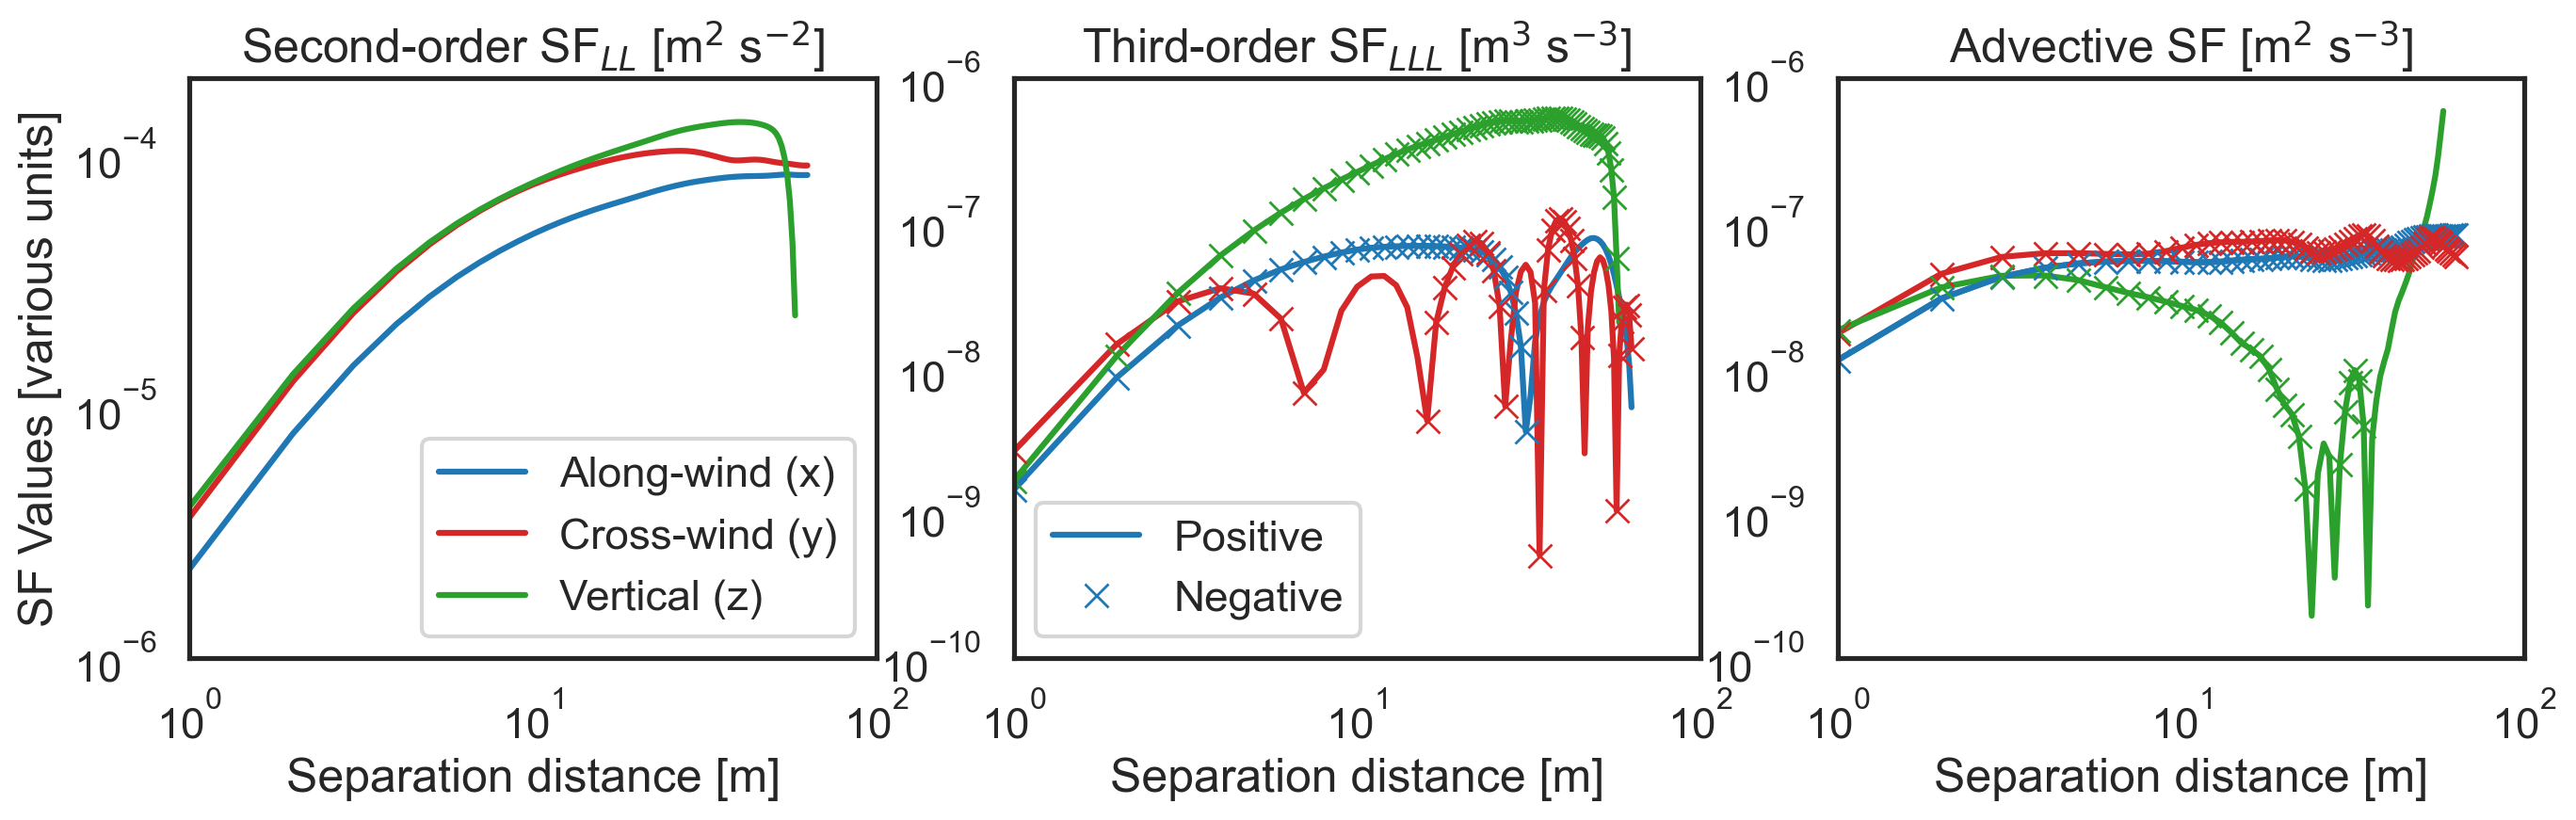

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)

ax[0].loglog(
    sf["x-diffs"], abs(sf["SF_LL_x"]), color="tab:blue", label="Along-wind (x)"
)
ax[0].loglog(sf["y-diffs"], abs(sf["SF_LL_y"]), color="tab:red", label="Cross-wind (y)")
ax[0].loglog(sf["z-diffs"], abs(sf["SF_LL_z"]), color="tab:green", label="Vertical (z)")

ax[0].loglog(
    sf["x-diffs"], -(sf["SF_LL_x"]), color="tab:blue", marker="x", linestyle="None"
)
ax[0].loglog(
    sf["y-diffs"], -(sf["SF_LL_y"]), color="tab:red", marker="x", linestyle="None"
)
ax[0].loglog(
    sf["z-diffs"], -(sf["SF_LL_z"]), color="tab:green", marker="x", linestyle="None"
)

ax[0].set_xlabel("Separation distance [m]")
ax[0].set_title("Second-order SF$_{LL}$ [m$^2$ s$^{-2}$]")
ax[0].set_ylim([1e-6, 2e-4])
ax[0].set_xlim([1, 100])
ax[0].set_ylabel("SF Values [various units]")
ax[0].legend()
ax[1].loglog(sf["x-diffs"], abs(sf["SF_LLL_x"]), color="tab:blue", label="Positive")
ax[1].loglog(sf["y-diffs"], abs(sf["SF_LLL_y"]), color="tab:red")
ax[1].loglog(sf["z-diffs"], abs(sf["SF_LLL_z"]), color="tab:green")

ax[1].loglog(
    sf["x-diffs"],
    -(sf["SF_LLL_x"]),
    color="tab:blue",
    marker="x",
    linestyle="None",
    label="Negative",
)
ax[1].loglog(
    sf["y-diffs"], -(sf["SF_LLL_y"]), color="tab:red", marker="x", linestyle="None"
)
ax[1].loglog(
    sf["z-diffs"], -(sf["SF_LLL_z"]), color="tab:green", marker="x", linestyle="None"
)

ax[1].set_xlabel("Separation distance [m]")
ax[1].set_title("Third-order SF$_{LLL}$ [m$^3$ s$^{-3}$]")
ax[1].set_ylim([1e-10, 1e-6])
ax[1].set_xlim([1, 100])
ax[1].legend()
ax[2].loglog(
    sf["x-diffs"],
    abs(sf["SF_advection_velocity_x"]),
    color="tab:blue",
    label="Positive",
)
ax[2].loglog(sf["y-diffs"], abs(sf["SF_advection_velocity_y"]), color="tab:red")
ax[2].loglog(sf["z-diffs"], abs(sf["SF_advection_velocity_z"]), color="tab:green")

ax[2].loglog(
    sf["x-diffs"],
    -(sf["SF_advection_velocity_x"]),
    color="tab:blue",
    marker="x",
    label="Negative",
)
ax[2].loglog(
    sf["y-diffs"],
    -(sf["SF_advection_velocity_y"]),
    color="tab:red",
    marker="x",
    linestyle="None",
)
ax[2].loglog(
    sf["z-diffs"],
    -(sf["SF_advection_velocity_z"]),
    color="tab:green",
    marker="x",
    linestyle="None",
)

ax[2].set_xlabel("Separation distance [m]")
ax[2].set_title("Advective SF [m$^2$ s$^{-3}$]")
ax[2].set_ylim([1e-10, 1e-6])
ax[2].set_xlim([1, 100]);